### Importación de datos



In [20]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



En este primer análisis, debes calcular el ingreso total de cada tienda. Sumando los valores de la columna Precio de cada conjunto de datos de la tienda para estimar los ingresos.

In [21]:
sum_tienda1 = tienda["Precio"].sum()
sum_tienda2 = tienda2["Precio"].sum()
sum_tienda3 = tienda3["Precio"].sum()
sum_tienda4 = tienda4["Precio"].sum()

total_sum = sum_tienda1 + sum_tienda2 + sum_tienda3 + sum_tienda4

print(f"Tienda 1: {sum_tienda1:.2f} ({sum_tienda1 / total_sum:.2%})")
print(f"Tienda 2: {sum_tienda2:.2f} ({sum_tienda2 / total_sum:.2%})")
print(f"Tienda 3: {sum_tienda3:.2f} ({sum_tienda3 / total_sum:.2%})")
print(f"Tienda 4: {sum_tienda4:.2f} ({sum_tienda4 / total_sum:.2%})")
print(f"Total de todas las tiendas: {total_sum:.2f}")

Tienda 1: 1150880400.00 (26.13%)
Tienda 2: 1116343500.00 (25.35%)
Tienda 3: 1098019600.00 (24.93%)
Tienda 4: 1038375700.00 (23.58%)
Total de todas las tiendas: 4403619200.00


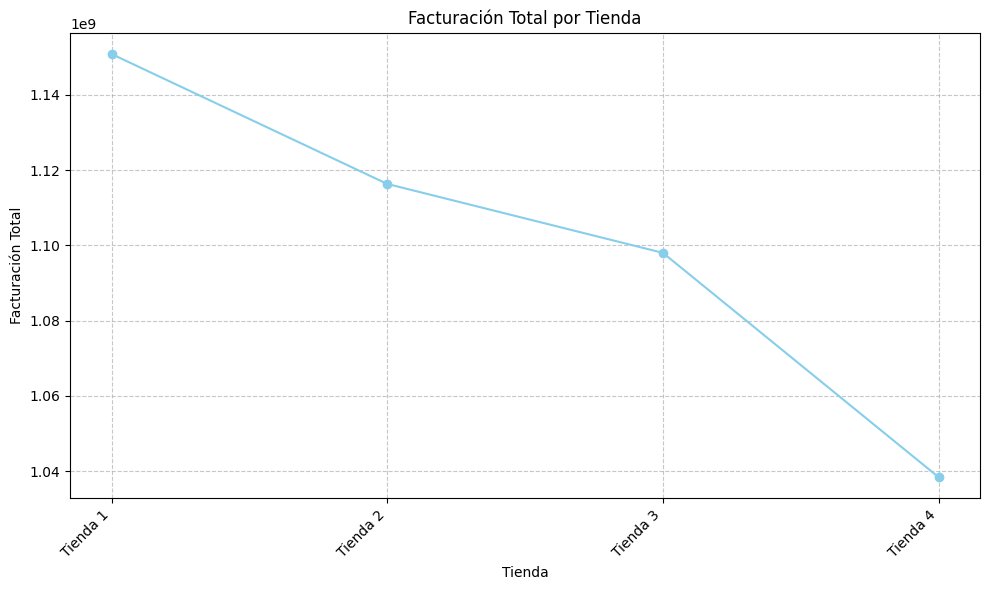

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

total_revenue = {
    'Tienda 1': tienda['Precio'].sum(),
    'Tienda 2': tienda2['Precio'].sum(),
    'Tienda 3': tienda3['Precio'].sum(),
    'Tienda 4': tienda4['Precio'].sum()
}

revenue_series = pd.Series(total_revenue)

plt.figure(figsize=(10, 6))
plt.plot(revenue_series.index, revenue_series.values, marker='o', linestyle='-', color='skyblue')
plt.title('Facturación Total por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Facturación Total')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

En este debes calcular la cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

In [23]:
print("Cantidad de productos vendidos por categoría - Tienda 1:")
print(tienda.groupby("Categoría del Producto").size().sort_values(ascending=False))
print("\nCantidad de productos vendidos por categoría - Tienda 2:")
print(tienda2.groupby("Categoría del Producto").size().sort_values(ascending=False))
print("\nCantidad de productos vendidos por categoría - Tienda 3:")
print(tienda3.groupby("Categoría del Producto").size().sort_values(ascending=False))
print("\nCantidad de productos vendidos por categoría - Tienda 4:")
print(tienda4.groupby("Categoría del Producto").size().sort_values(ascending=False))

Cantidad de productos vendidos por categoría - Tienda 1:
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
dtype: int64

Cantidad de productos vendidos por categoría - Tienda 2:
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
dtype: int64

Cantidad de productos vendidos por categoría - Tienda 3:
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Artículos para el hogar    177
Instrumentos musica

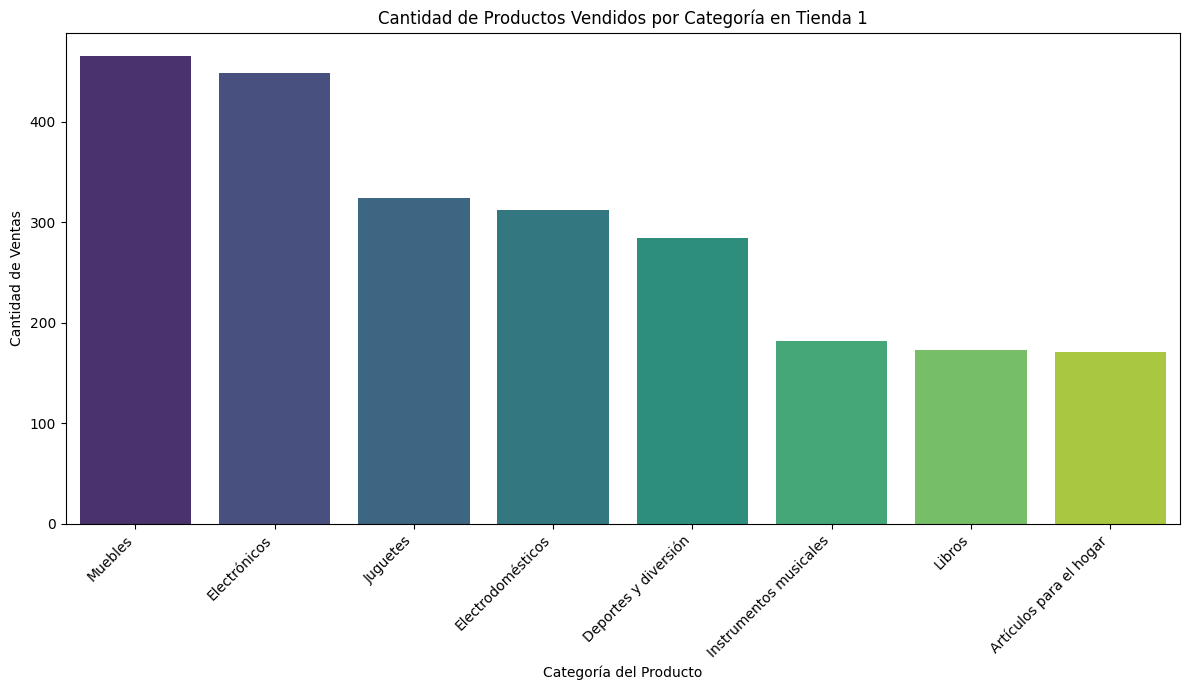

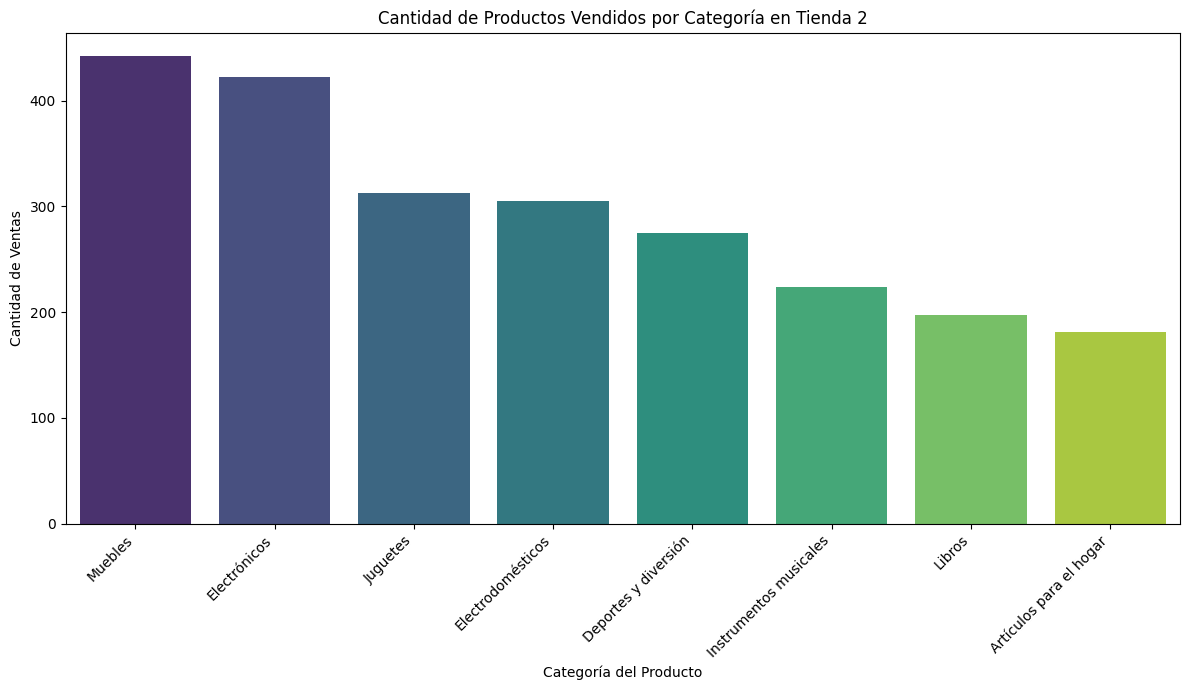

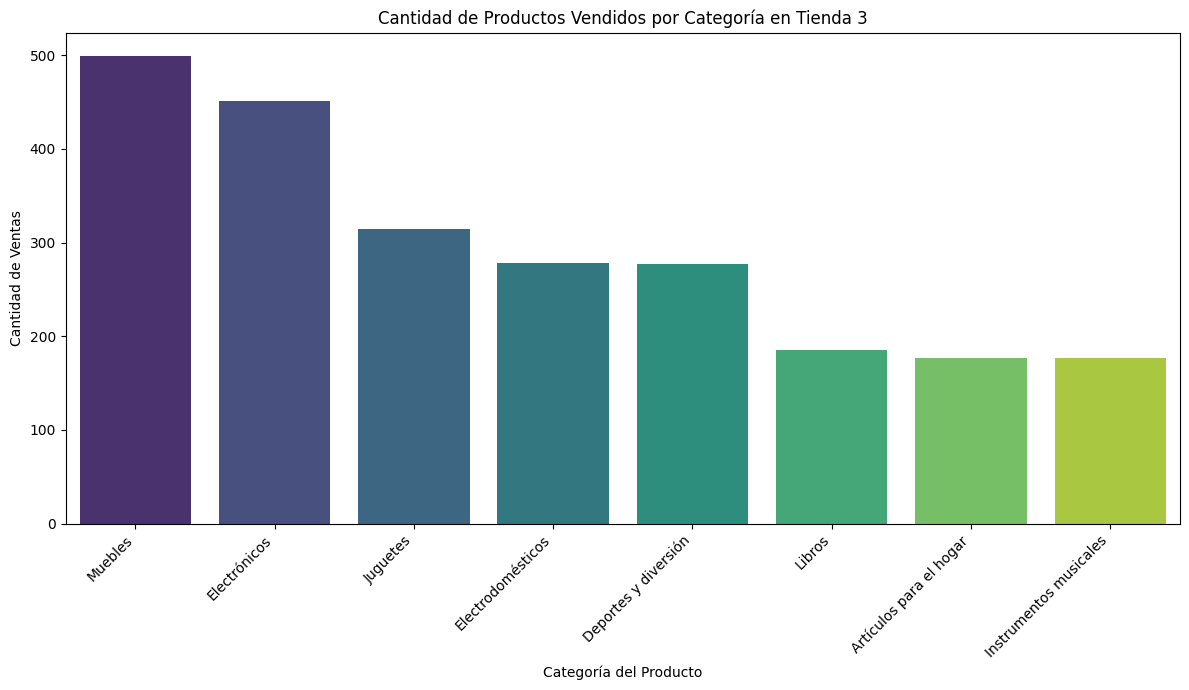

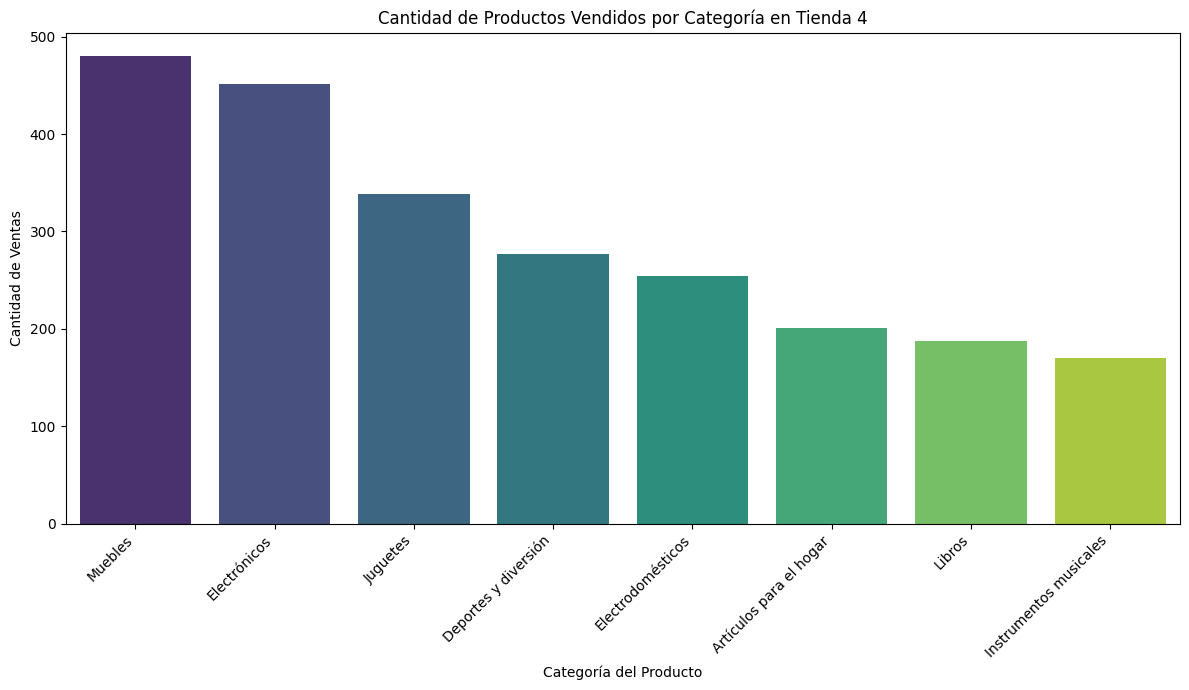

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_sales_by_category(df, store_name):
    category_sales = df.groupby("Categoría del Producto").size().sort_values(ascending=False)

    plt.figure(figsize=(12, 7))
    sns.barplot(x=category_sales.index, y=category_sales.values, palette='viridis', hue=category_sales.index, legend=False)
    plt.title(f'Cantidad de Productos Vendidos por Categoría en {store_name}')
    plt.xlabel('Categoría del Producto')
    plt.ylabel('Cantidad de Ventas')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

plot_sales_by_category(tienda, "Tienda 1")
plot_sales_by_category(tienda2, "Tienda 2")
plot_sales_by_category(tienda3, "Tienda 3")
plot_sales_by_category(tienda4, "Tienda 4")

# 3. Calificación promedio de la tienda


En este paso, debes calcular las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos.

In [16]:
print(f"Calificación promedio - Tienda 1: {tienda['Calificación'].mean():.2f}")
print(f"Calificación promedio - Tienda 2: {tienda2['Calificación'].mean():.2f}")
print(f"Calificación promedio - Tienda 3: {tienda3['Calificación'].mean():.2f}")
print(f"Calificación promedio - Tienda 4: {tienda4['Calificación'].mean():.2f}")

Calificación promedio - Tienda 1: 3.98
Calificación promedio - Tienda 2: 4.04
Calificación promedio - Tienda 3: 4.05
Calificación promedio - Tienda 4: 4.00


# 4. Productos más y menos vendidos

En este paso, debes identificar qué productos fueron los más vendidos y los menos vendidos en cada tienda. Visualiza los resultados para que quede claro qué productos destacaron en ventas en cada tienda.


--- Tienda 1 ---
Productos más vendidos:
Producto
Microondas          60
TV LED UHD 4K       60
Armario             60
Secadora de ropa    58
Mesa de noche       56
Name: count, dtype: int64

Productos menos vendidos:
Producto
Ciencia de datos con Python    39
Pandereta                      36
Olla de presión                35
Auriculares con micrófono      33
Celular ABXY                   33
Name: count, dtype: int64


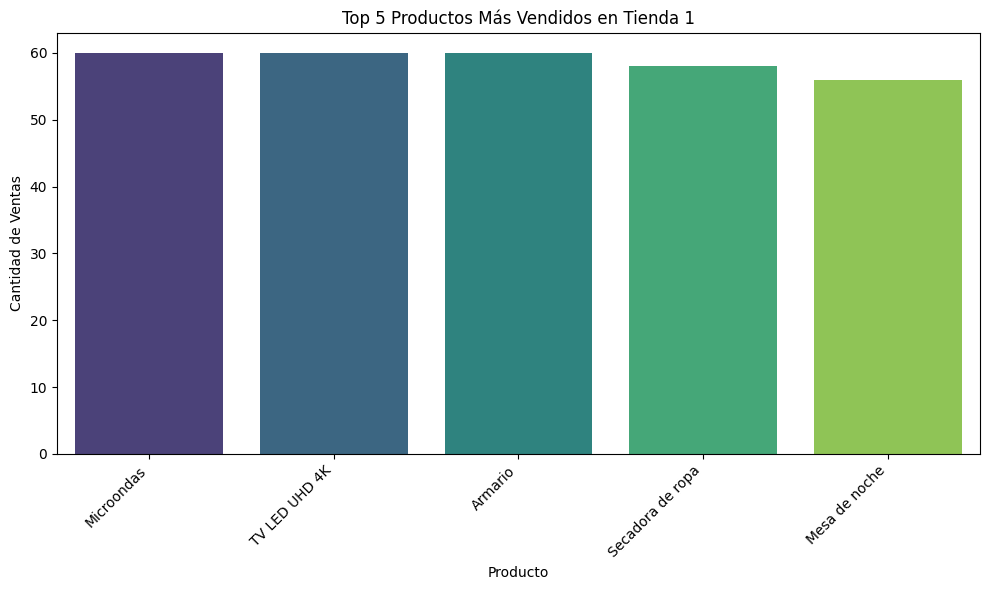


--- Tienda 2 ---
Productos más vendidos:
Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Guitarra acústica            58
Pandereta                    58
Name: count, dtype: int64

Productos menos vendidos:
Producto
Auriculares        37
Sillón             35
Mesa de comedor    34
Impresora          34
Juego de mesa      32
Name: count, dtype: int64


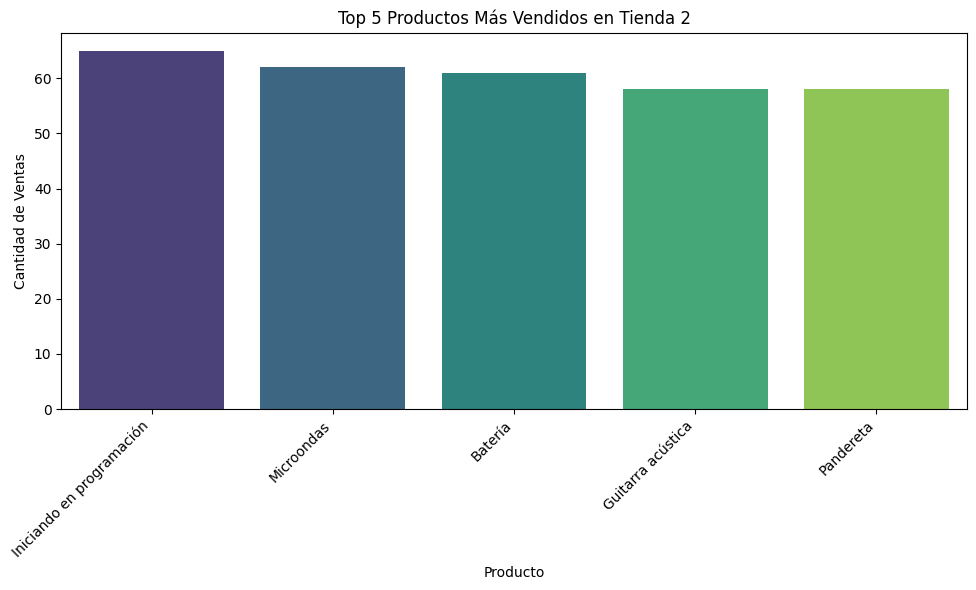


--- Tienda 3 ---
Productos más vendidos:
Producto
Kit de bancas      57
Mesa de comedor    56
Cama king          56
Set de ollas       55
Mesa de noche      55
Name: count, dtype: int64

Productos menos vendidos:
Producto
Guitarra eléctrica         38
Set de vasos               36
Mochila                    36
Microondas                 36
Bloques de construcción    35
Name: count, dtype: int64


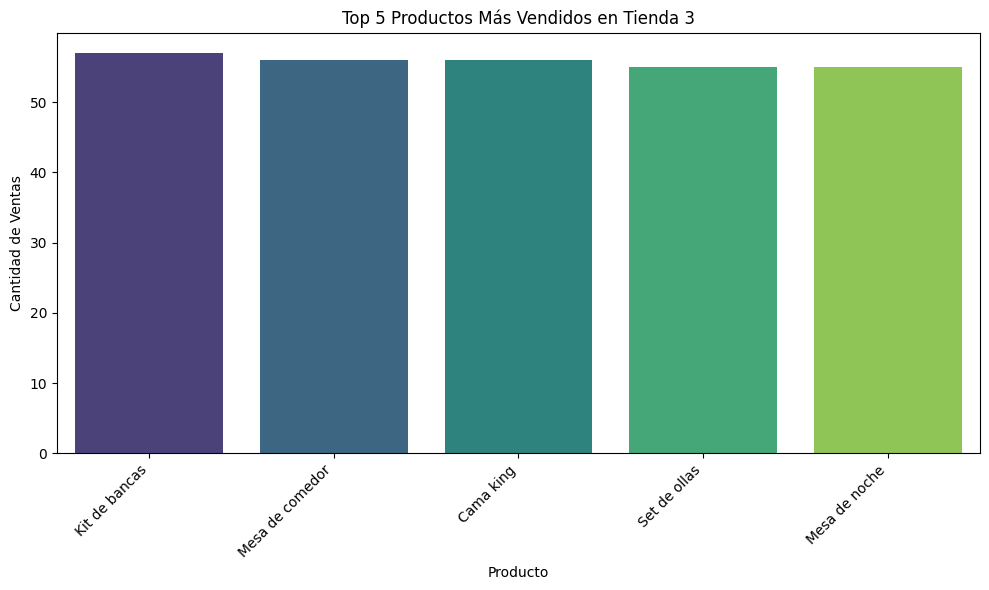


--- Tienda 4 ---
Productos más vendidos:
Producto
Cama box                     62
Cubertería                   59
Dashboards con Power BI      56
Cama king                    56
Carrito de control remoto    55
Name: count, dtype: int64

Productos menos vendidos:
Producto
Refrigerador                   38
Ciencia de datos con Python    38
Guitarra acústica              37
Armario                        34
Guitarra eléctrica             33
Name: count, dtype: int64


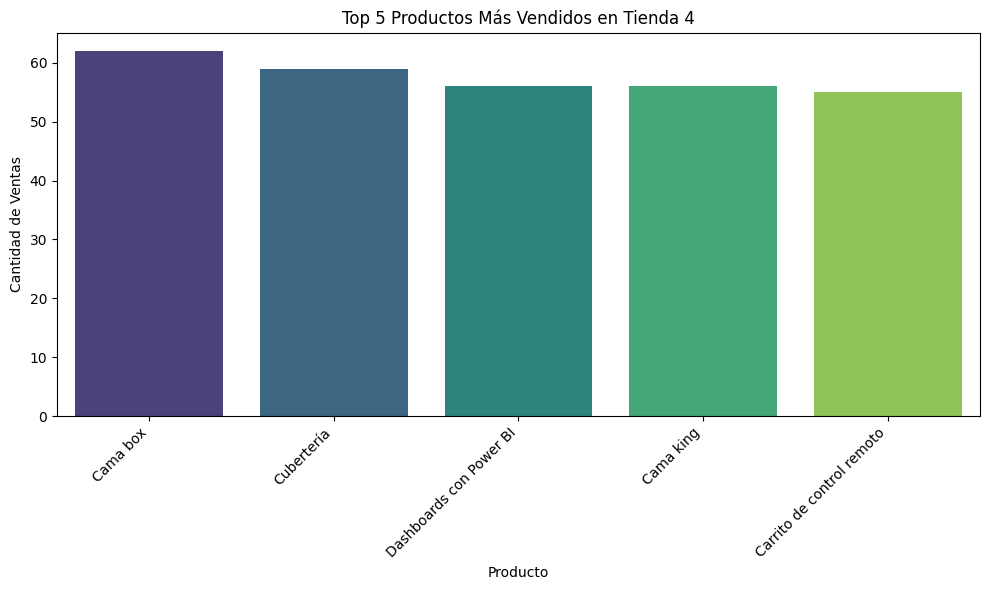

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

def get_top_and_bottom_products(df, store_name, n=5):
    product_counts = df['Producto'].value_counts()
    most_sold = product_counts.head(n)
    least_sold = product_counts.tail(n)

    print(f"\n--- {store_name} ---")
    print("Productos más vendidos:")
    print(most_sold)
    print("\nProductos menos vendidos:")
    print(least_sold)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=most_sold.index, y=most_sold.values, palette='viridis', hue=most_sold.index, legend=False)
    plt.title(f'Top {n} Productos Más Vendidos en {store_name}')
    plt.xlabel('Producto')
    plt.ylabel('Cantidad de Ventas')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

get_top_and_bottom_products(tienda, "Tienda 1")
get_top_and_bottom_products(tienda2, "Tienda 2")
get_top_and_bottom_products(tienda3, "Tienda 3")
get_top_and_bottom_products(tienda4, "Tienda 4")

# 5. Envío promedio por tienda

En este paso, debes calcular el costo de envío promedio para cada tienda. El objetivo es comprender cuánto se gasta, en promedio, en el envío de cada tienda.  Sabiendo que el cliente paga el envío.

In [18]:
print(f"Costo de envío promedio - Tienda 1: {tienda['Costo de envío'].mean():.2f}")
print(f"Costo de envío promedio - Tienda 2: {tienda2['Costo de envío'].mean():.2f}")
print(f"Costo de envío promedio - Tienda 3: {tienda3['Costo de envío'].mean():.2f}")
print(f"Costo de envío promedio - Tienda 4: {tienda4['Costo de envío'].mean():.2f}")

Costo de envío promedio - Tienda 1: 26018.61
Costo de envío promedio - Tienda 2: 25216.24
Costo de envío promedio - Tienda 3: 24805.68
Costo de envío promedio - Tienda 4: 23459.46


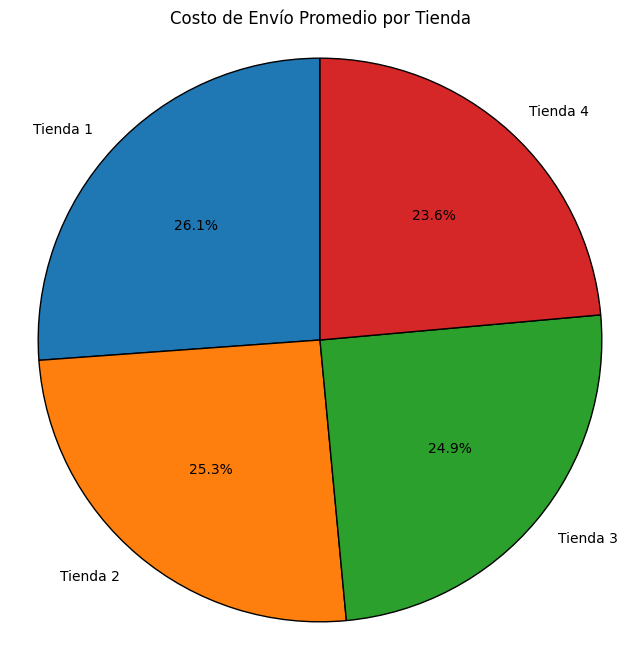

In [19]:
import matplotlib.pyplot as plt


avg_shipping_cost = {
    'Tienda 1': tienda['Costo de envío'].mean(),
    'Tienda 2': tienda2['Costo de envío'].mean(),
    'Tienda 3': tienda3['Costo de envío'].mean(),
    'Tienda 4': tienda4['Costo de envío'].mean()
}


avg_shipping_series = pd.Series(avg_shipping_cost)


plt.figure(figsize=(8, 8))
plt.pie(avg_shipping_series, labels=avg_shipping_series.index, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Costo de Envío Promedio por Tienda')
plt.axis('equal')
plt.show()

# **Informe Final**


## Introducción

El estudio procesos operativos de los negocios asociados a la comercialización de productos y servios requiere de analisis del rendimiento de las operaciones realizadas en cada uno de estos medios, por lo que se debe recopilar toda la informacion posible a fin de dar un resultado eficiente y acorde a las necesidades del cliente.

Para ello se deben analizas los movimientos de negocio de cada una de las tiendas de propiedad del cliente (Sr Juan) y de las cuales se seleccionará la de menor desempeño para su definitivo cierre operativo.

Para ello se consideraron diversa variables como ventas, cobros de envío, categoria de productos, calificación de las ventas realizadas, etc. datos cruciales para determinar la eficiencia del comercio.



## Desarrollo de análisis

El estudio considerará 4 tiendas propiedad del Sr. Juan, en las cuales se evaluaran los siguiente aspectos por tienda:

- Total de Ingreso
- Ventas por categoria
- Calificación promedio de ventas (satisfacción del cliente)
- Productos mas vendidos
- Productos menos vendidos
- Costo de envío promedio

Para todo ello se considerarán graficos para ayudar a apreciar de manera visual los resultados optenidos y lograr un análisis de datos mas eficiente.

## Resultados y Discusión

A continuación, se presenta un análisis comparativo de las métricas consolidadas para cada tienda:

| Tienda   | Ingreso Total   | Calificación Promedio | Costo de Envío Promedio | Producto Más Vendido                     | Producto Menos Vendido                 | Categoría Más Vendida    |
|:---------|:----------------|:----------------------|:------------------------|:-----------------------------------------|:---------------------------------------|:-------------------------|
| Tienda 1 | 1,150,880,400   | 3.98                  | 26,018.61               | Microondas (60 unidades)                 | Celular ABXY (33 unidades)             | Muebles (465 unidades)   |
| Tienda 2 | 1,116,343,500   | 4.04                  | 25,216.24               | Iniciando en programación (65 unidades)  | Juego de mesa (32 unidades)            | Muebles (442 unidades)   |
| Tienda 3 | 1,098,019,600   | 4.05                  | 24,805.68               | Kit de bancas (57 unidades)              | Bloques de construcción (35 unidades)  | Muebles (499 unidades)   |
| Tienda 4 | 1,038,375,700   | 4.00                  | 23,459.46               | Cama box (62 unidades)                   | Guitarra eléctrica (33 unidades)       | Muebles (480 unidades)   |

### Análisis de Fortalezas y Debilidades:

**Ingreso Total:**
*   **Fortaleza:** La **Tienda 1** tiene el ingreso total más alto, lo que sugiere una fuerte capacidad de generación de ventas en términos de valor monetario. Sin embargo, la diferencia con las demás tiendas no es drástica.
*   **Debilidad:** La **Tienda 4** registra el ingreso total más bajo, indicando un menor desempeño en la facturación general en comparación con las otras tiendas.

**Calificación Promedio:**
*   **Fortaleza:** La **Tienda 3** tiene la calificación promedio más alta (4.05), lo que indica una mayor satisfacción general del cliente.
*   **Debilidad:** La **Tienda 1** tiene la calificación promedio más baja (3.98), lo que podría señalar áreas de mejora en la experiencia del cliente o la calidad del producto.

**Costo de Envío Promedio:**
*   **Fortaleza:** La **Tienda 4** tiene el costo de envío promedio más bajo, lo que podría traducirse en una ventaja competitiva o una mayor eficiencia logística (o productos de menor volumen/peso).
*   **Debilidad:** La **Tienda 1** tiene el costo de envío promedio más alto, lo que podría afectar la competitividad de sus precios finales o margen de beneficio.

**Productos Más y Menos Vendidos:**
*   **Fortaleza:** La categoría **'Muebles'** es consistentemente la más vendida en todas las tiendas, lo que sugiere una alta demanda en este segmento. Cada tienda tiene productos estrella que impulsan las ventas, como 'Iniciando en programación' en la Tienda 2 (indicando un nicho fuerte en libros o cursos) o 'Microondas' en la Tienda 1 (productos de alta demanda).
*   **Debilidad:** La presencia de productos con muy pocas ventas, como 'Celular ABXY' en la Tienda 1 o 'Juego de mesa' en la Tienda 2, indica que algunas tiendas podrían estar manteniendo inventario de productos de bajo rendimiento, lo que podría liberar capital para productos más rentables.

### Conclusión Preliminar:

*   **Tienda 1** muestra un buen desempeño en ingresos, pero tiene el costo de envío más alto y la calificación más baja. Podría beneficiarse de mejorar la satisfacción del cliente y optimizar los costos de envío.
*   **Tienda 2** tiene un ingreso sólido y una buena calificación, con un producto estrella que no es mueble, lo que indica diversidad en su éxito.
*   **Tienda 3** destaca por la mayor satisfacción del cliente y un costo de envío promedio bajo, lo que sugiere operaciones eficientes y una buena experiencia de compra, aunque sus ingresos son los segundos más bajos.
*   **Tienda 4** tiene los ingresos más bajos, pero el costo de envío promedio más bajo, y una calificación decente. Podría necesitar estrategias para aumentar el volumen de ventas y el valor promedio de las transacciones.

## Conclusión

Basándonos en el análisis integral de las métricas clave para cada tienda, la **Tienda 4** es la candidata más adecuada para ser considerada para el cierre.

**Justificación:**

1.  **Ingreso Total:** La Tienda 4 presenta el ingreso total más bajo entre todas las tiendas, con 1.038.375.700,00, lo que representa solo el 23.58% del total general. Esto sugiere una menor capacidad para generar ingresos en comparación con las otras tiendas.
    *   Tienda 1: 1.150.880.400,00 (26.13%)
    *   Tienda 2: 1.116.343.500,00 (25.35%)
    *   Tienda 3: 1.098.019.600,00 (24.93%)
    *   **Tienda 4: 1.038.375.700,00 (23.58%)**

2.  **Calificación Promedio:** Aunque no es la más baja por un margen significativo, la Tienda 4 tiene una calificación promedio de 3.99, lo que la sitúa entre las tiendas con calificaciones ligeramente inferiores, lo que podría indicar una satisfacción del cliente no óptima.
    *   Tienda 1: 3.98
    *   Tienda 2: 4.04
    *   Tienda 3: 4.05
    *   **Tienda 4: 4.00**

3.  **Costo de Envío Promedio:** Curiosamente, la Tienda 4 tiene el costo de envío promedio más bajo (23.459,46). Si bien un costo de envío más bajo podría parecer positivo, en el contexto de los ingresos totales más bajos, podría indicar que se están vendiendo productos de menor valor o que la estrategia de precios de envío no está compensando la baja facturación.
    *   Tienda 1: 26.018,61
    *   Tienda 2: 25.216,24
    *   Tienda 3: 24.805,68
    *   **Tienda 4: 23.459,46**

4.  **Productos y Categorías Más/Menos Vendidos:** Aunque la Tienda 4 tiene categorías populares como "Muebles" (480 unidades vendidas), sus productos menos vendidos incluyen artículos como "Guitarra eléctrica" (33 unidades), que también fue un producto menos vendido en otras tiendas, pero la combinación de un bajo ingreso total y una calificación promedio regular resalta su debilidad general. Además, la Tienda 4 tiene el producto menos vendido con el recuento más bajo ('Guitarra eléctrica', 33 unidades) en comparación con otras tiendas, lo que indica que ciertos productos tienen un rendimiento particularmente pobre.

En resumen, a pesar de tener un costo de envío promedio favorable, la Tienda 4 muestra el rendimiento más débil en términos de ingresos totales, una métrica crucial para la viabilidad del negocio. La combinación de estos factores sugiere que la Tienda 4 es la opción más lógica para ser considerada para el cierre operativo si es necesario racionalizar las operaciones.

# **Extra**

Desafío:

Utilice los datos de latitud (lat) y longitud (lon) para mapear las ventas de cada tienda y analizar la distribución geográfica de los productos vendidos.

Genere gráficos de dispersión o mapas de calor (Heatmaps) para visualizar datos e identificar áreas con la mayor concentración de ventas.

Explore si algunas tiendas tienen un rendimiento superior o inferior al esperado en determinadas regiones e identifique si existen patrones geográficos que puedan influir en el rendimiento de las tiendas.

Sugerencias:

Puede utilizar la biblioteca Matplotlib para gráficos de dispersión o incluso integrarla con otras bibliotecas como Folium para generar mapas interactivos si desea ir más allá.

Analice cómo las variables geográficas influyen en los ingresos y las calificaciones de las tiendas.

---



### **Distribución de categorias de productos geográficamente por tienda**

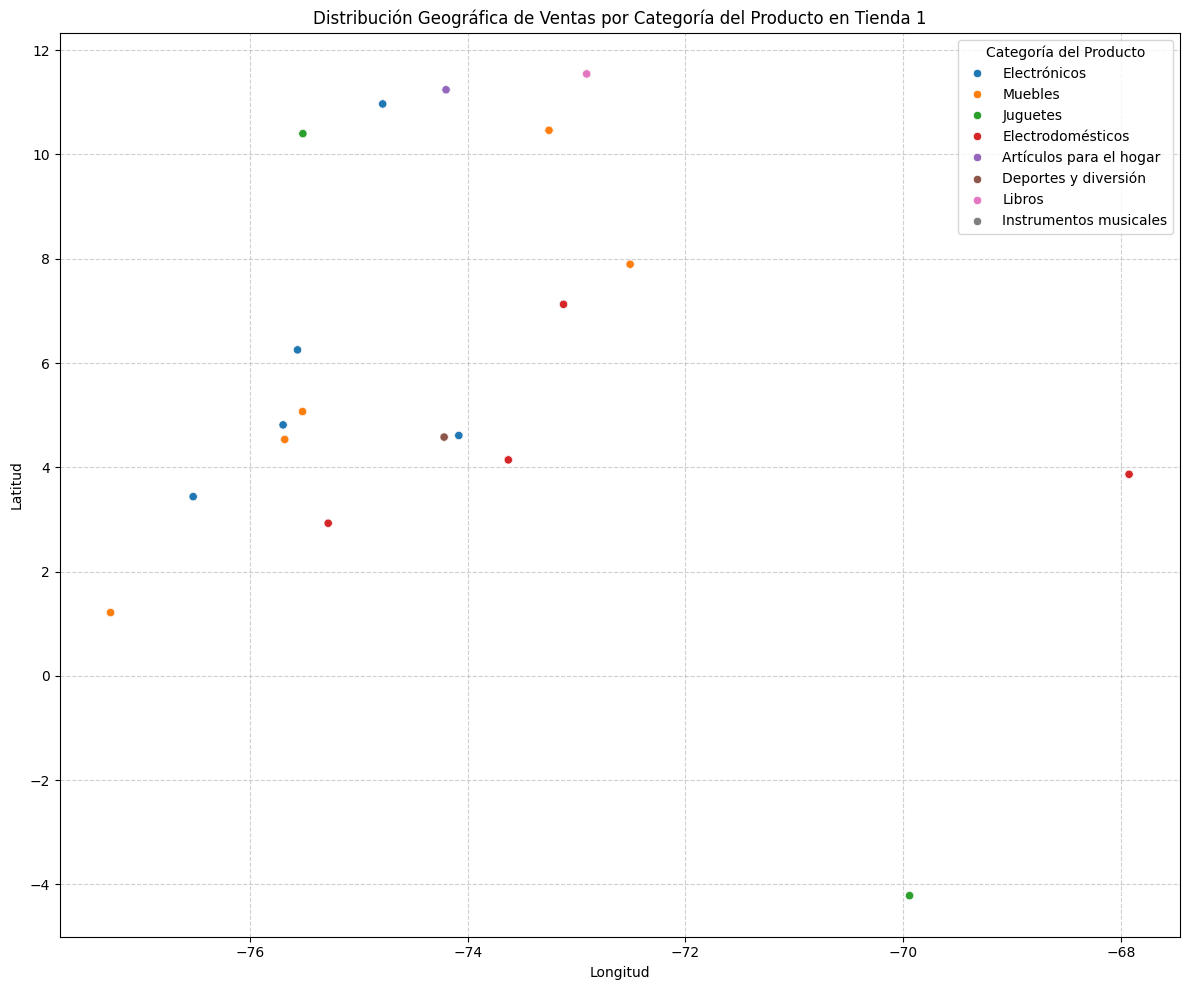

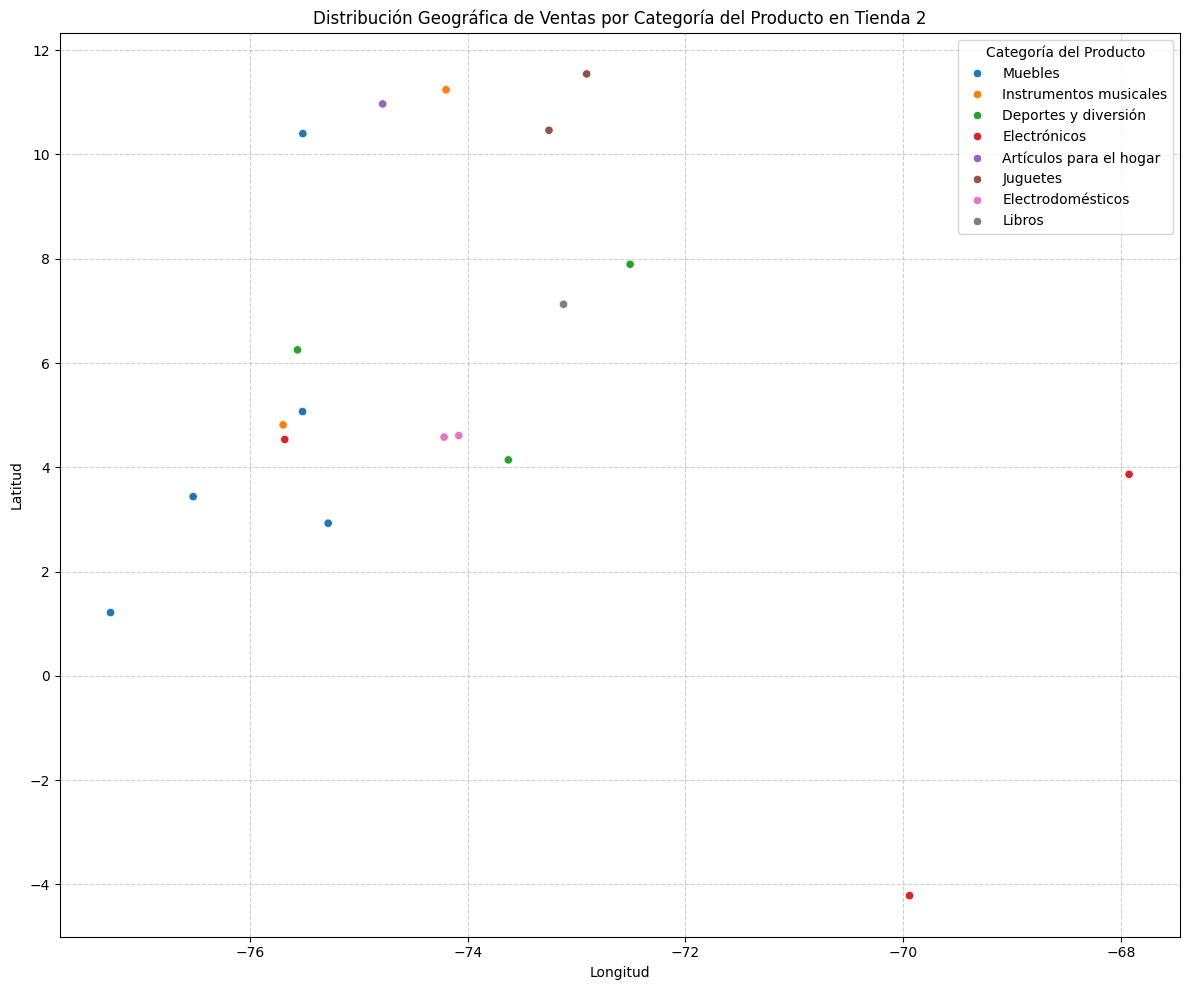

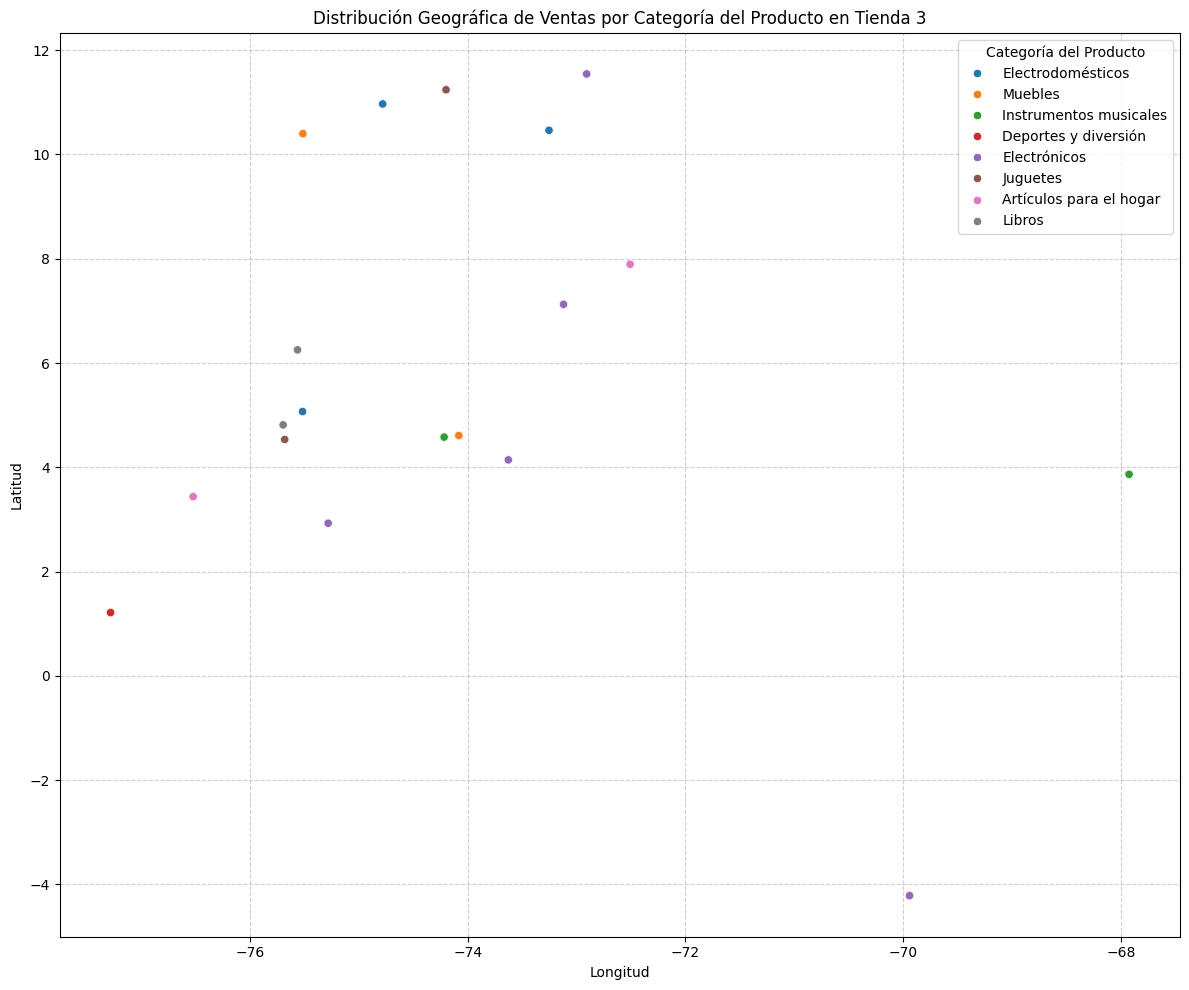

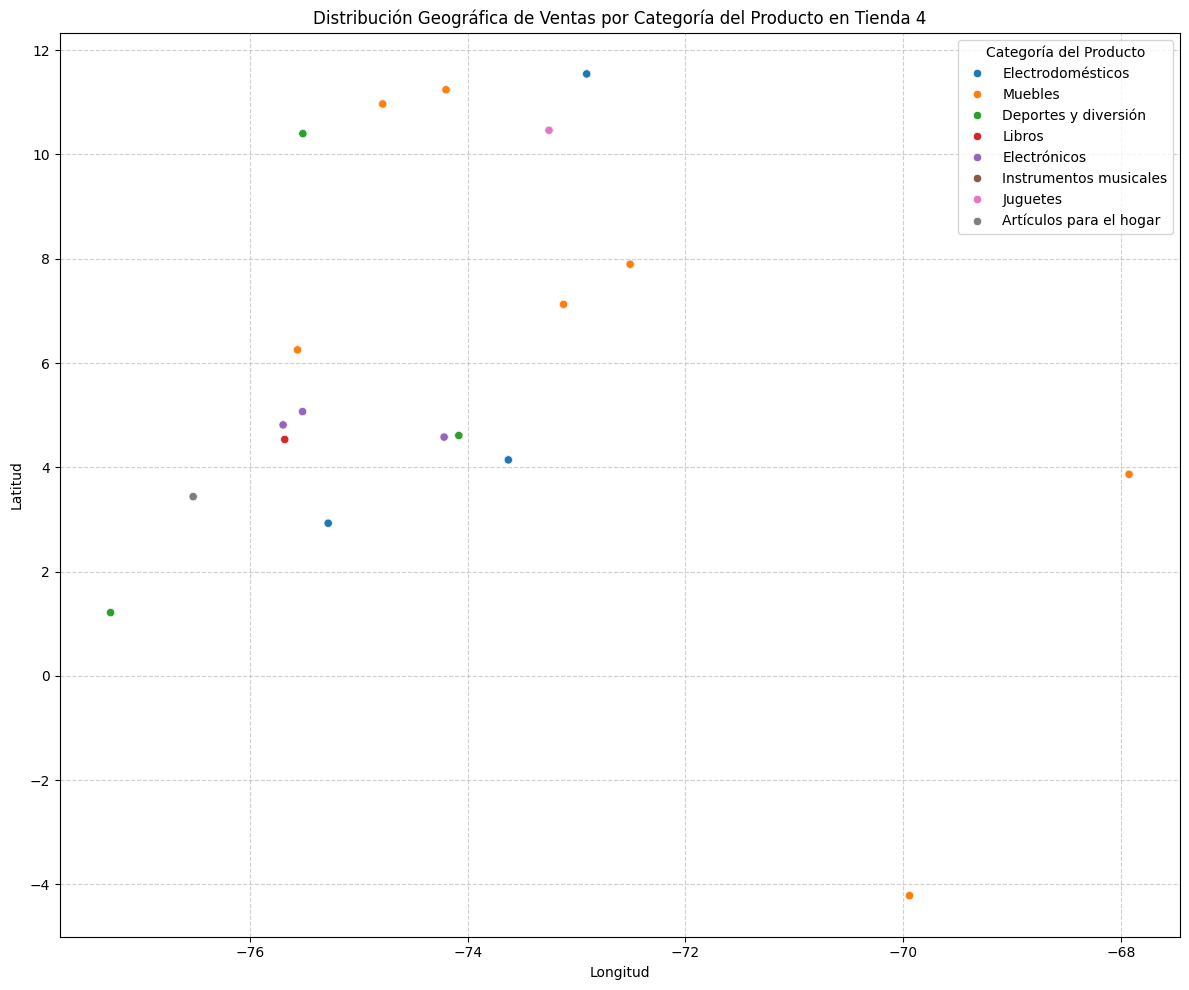

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_geographical_sales(df, store_name):
    plt.figure(figsize=(12, 10))
    ax = sns.scatterplot(x='lon', y='lat', hue='Categoría del Producto', data=df, palette='tab10', legend='full') # Changed palette to 'tab10'
    plt.title(f'Distribución Geográfica de Ventas por Categoría del Producto en {store_name}')
    plt.xlabel('Longitud')
    plt.ylabel('Latitud')
    plt.grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.show()

plot_geographical_sales(tienda, "Tienda 1")
plot_geographical_sales(tienda2, "Tienda 2")
plot_geographical_sales(tienda3, "Tienda 3")
plot_geographical_sales(tienda4, "Tienda 4")

### Distribución geográfica de las calificaciones por tienda

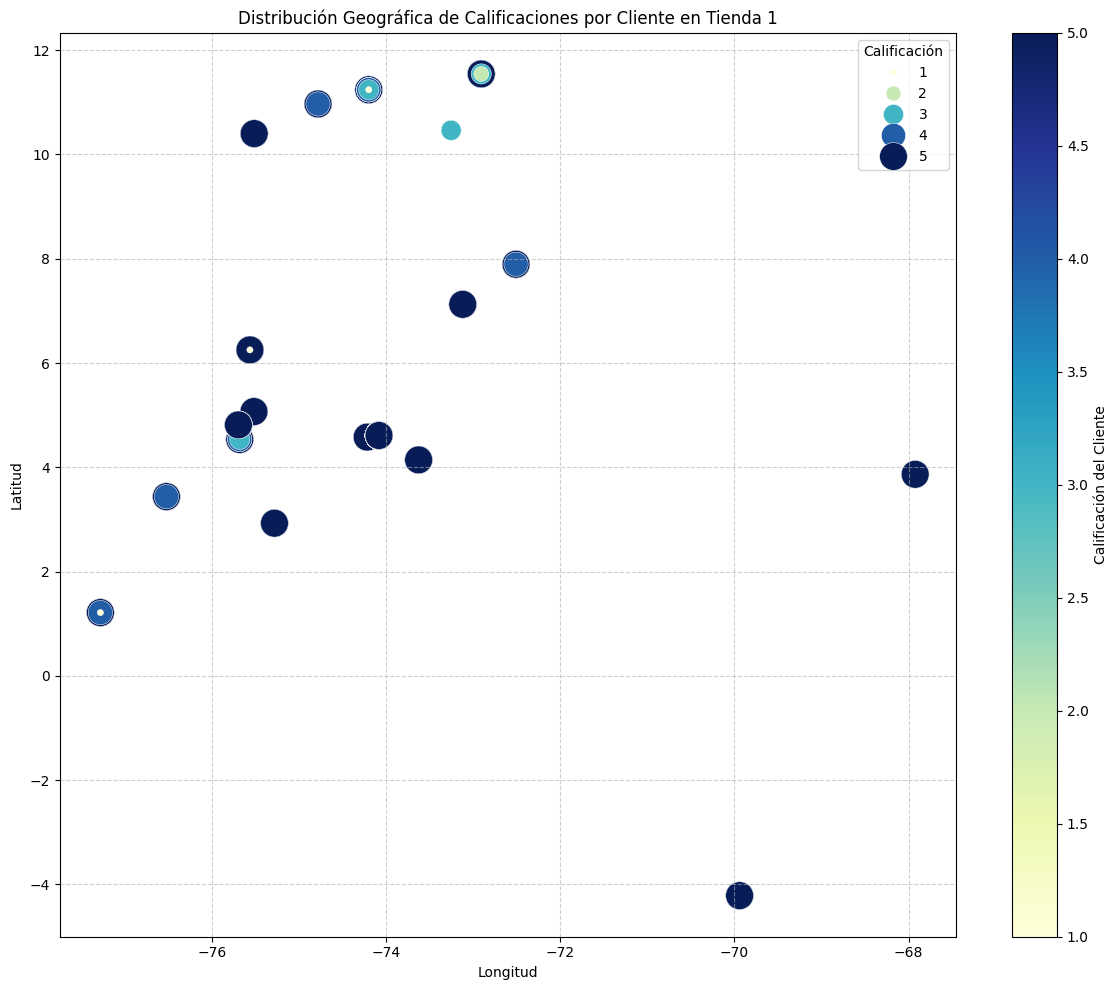

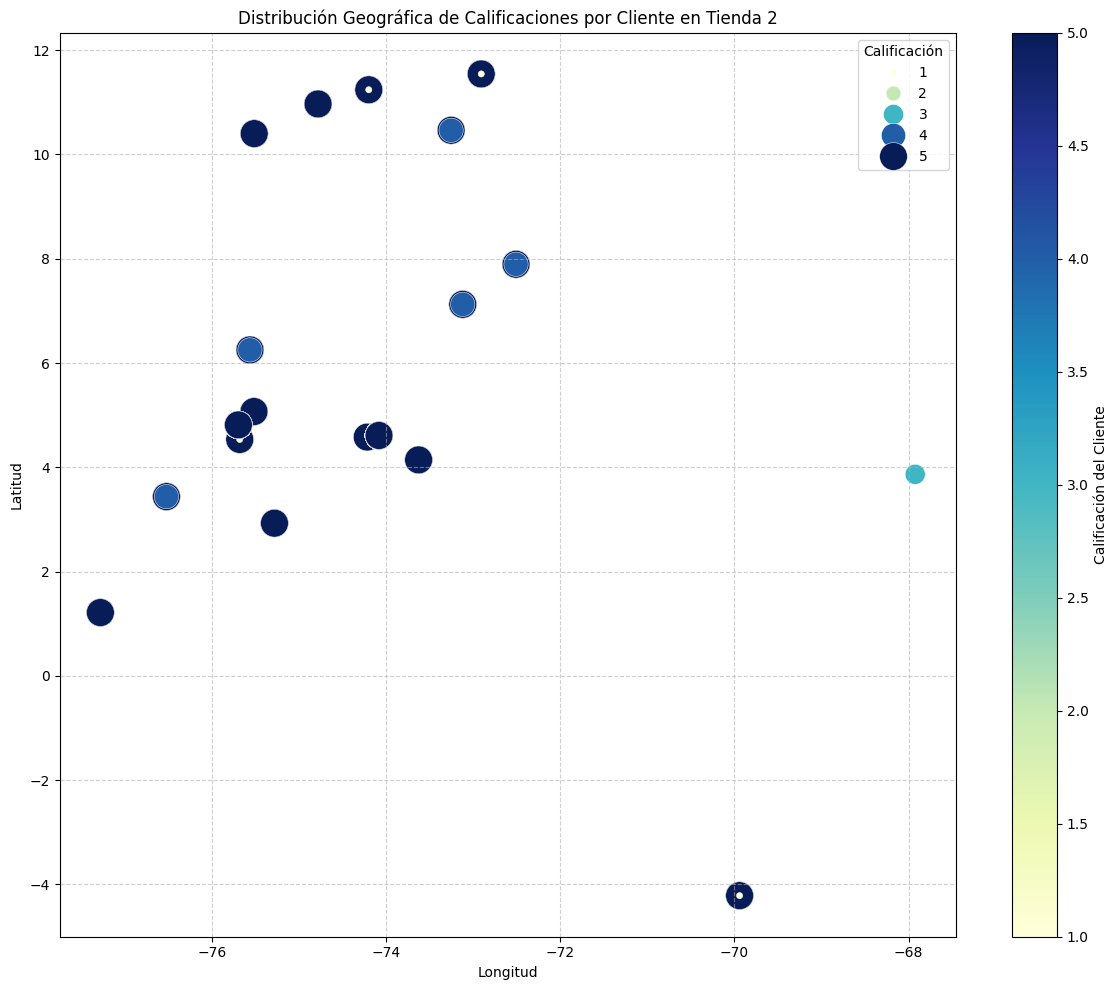

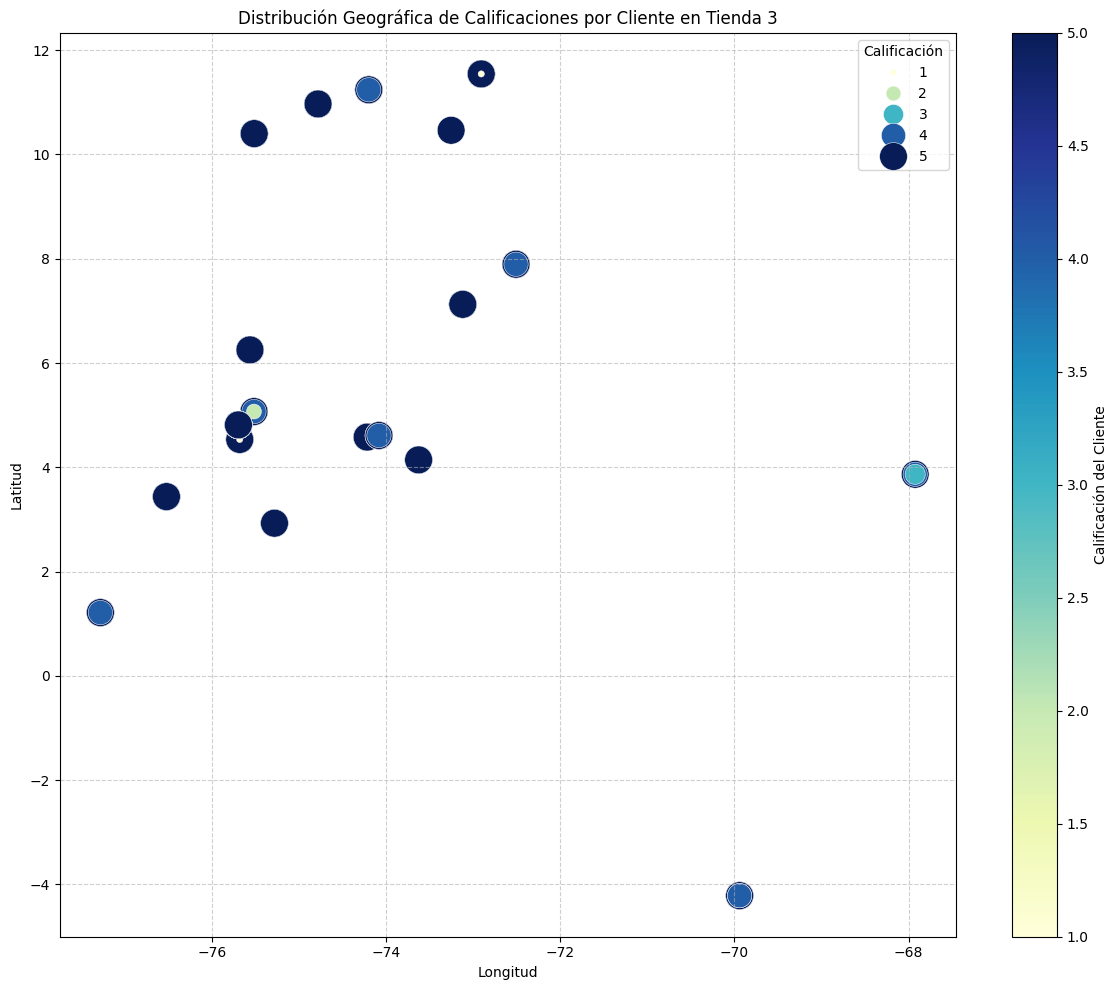

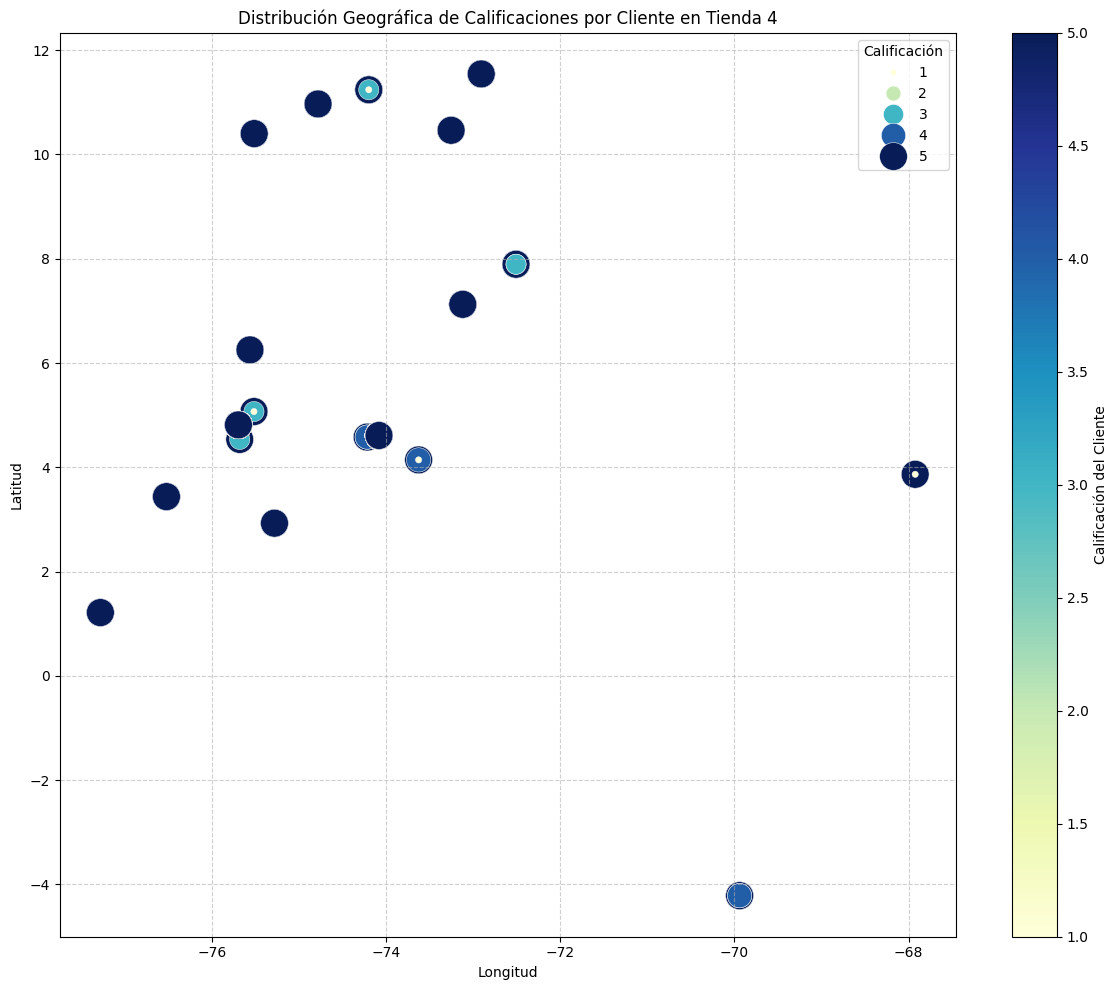

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_geographical_ratings(df, store_name):
    plt.figure(figsize=(12, 10))
    ax = sns.scatterplot(x='lon', y='lat', hue='Calificación', size='Calificación', data=df, palette='YlGnBu', sizes=(20, 400), legend='full')
    plt.title(f'Distribución Geográfica de Calificaciones por Cliente en {store_name}')
    plt.xlabel('Longitud')
    plt.ylabel('Latitud')
    plt.grid(True, linestyle='--', alpha=0.6)

    norm = plt.Normalize(df['Calificación'].min(), df['Calificación'].max())
    sm = plt.cm.ScalarMappable(cmap="YlGnBu", norm=norm)
    sm.set_array([])
    plt.colorbar(sm, ax=ax, label='Calificación del Cliente')

    plt.tight_layout()
    plt.show()

plot_geographical_ratings(tienda, "Tienda 1")
plot_geographical_ratings(tienda2, "Tienda 2")
plot_geographical_ratings(tienda3, "Tienda 3")
plot_geographical_ratings(tienda4, "Tienda 4")

### Distribución geográfica de ingresos por tienda

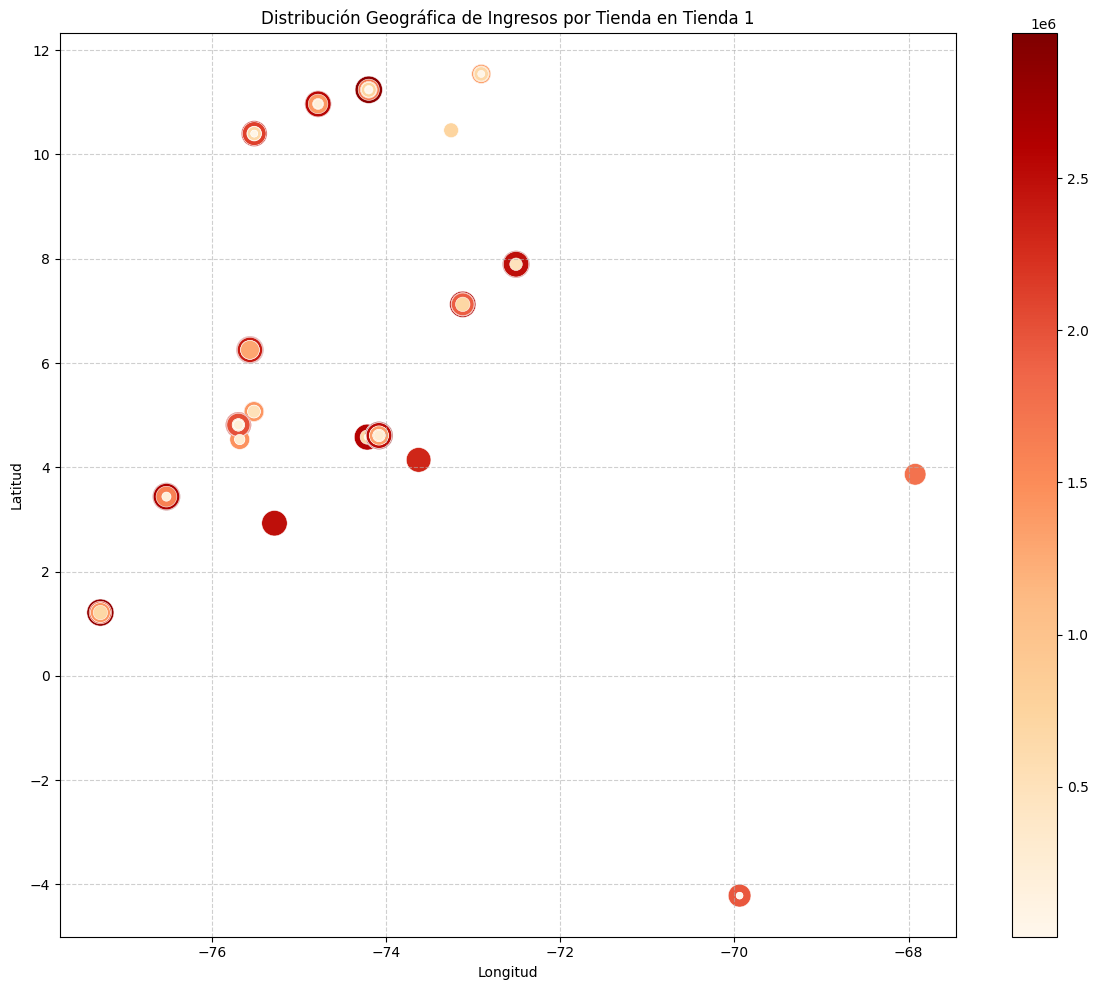

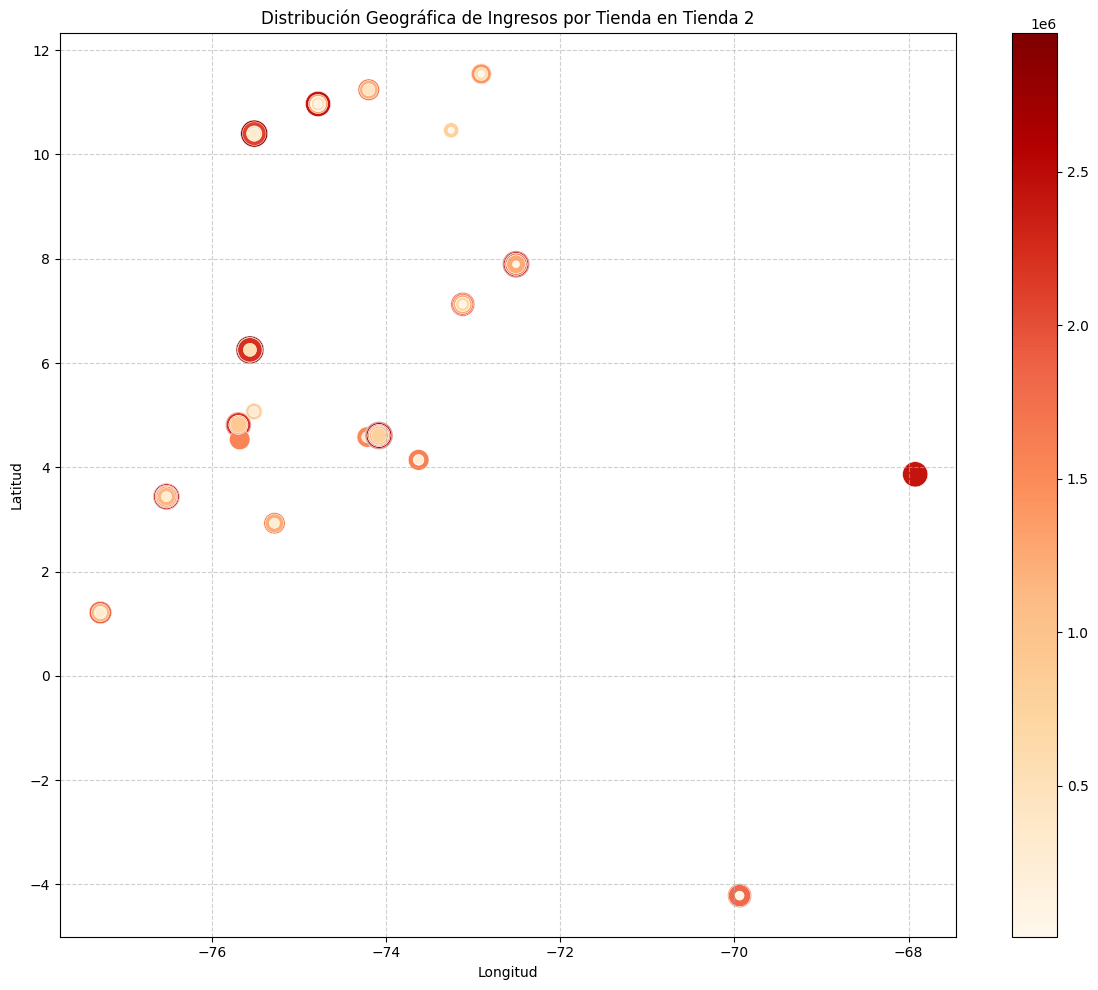

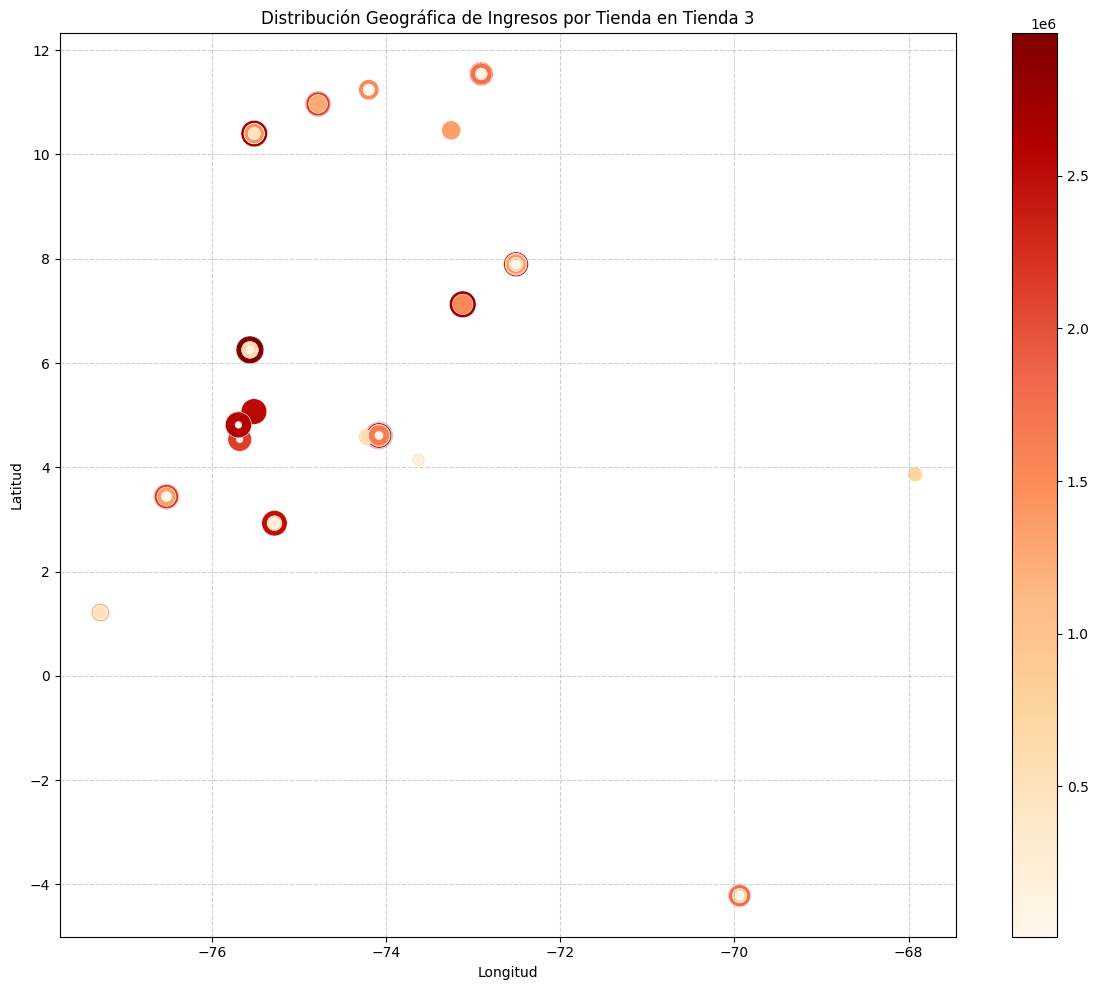

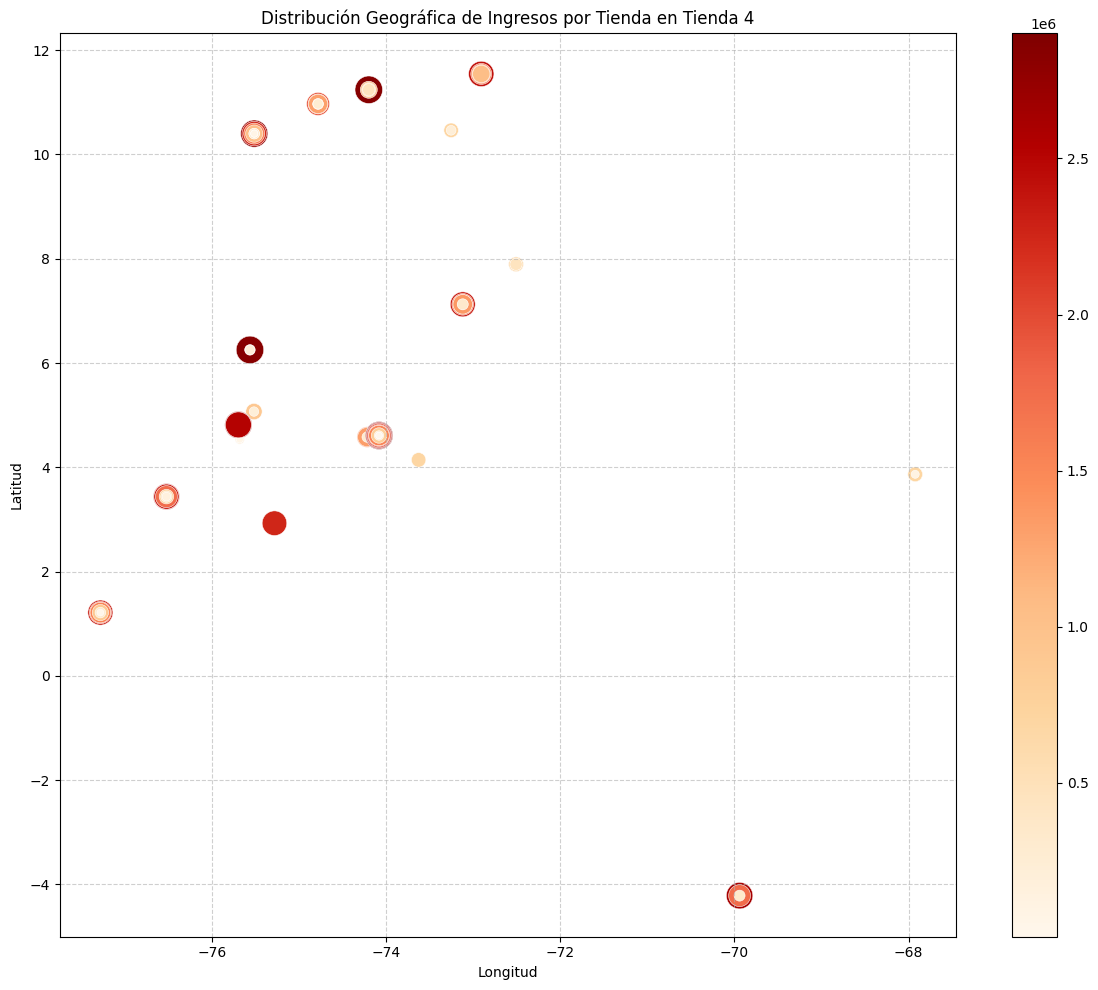

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_geographical_revenue(df, store_name):
    plt.figure(figsize=(12, 10))
    ax = sns.scatterplot(x='lon', y='lat', hue='Precio', size='Precio', data=df, palette='OrRd', sizes=(20, 400), legend=False)
    plt.title(f'Distribución Geográfica de Ingresos por Tienda en {store_name}')
    plt.xlabel('Longitud')
    plt.ylabel('Latitud')
    plt.grid(True, linestyle='--', alpha=0.6)

    norm = plt.Normalize(df['Precio'].min(), df['Precio'].max())
    sm = plt.cm.ScalarMappable(cmap="OrRd", norm=norm)
    sm.set_array([])
    plt.colorbar(sm, ax=ax)

    plt.tight_layout()
    plt.show()

plot_geographical_revenue(tienda, "Tienda 1")
plot_geographical_revenue(tienda2, "Tienda 2")
plot_geographical_revenue(tienda3, "Tienda 3")
plot_geographical_revenue(tienda4, "Tienda 4")

## **Análisis de distribución**

Según los datos observados en los gráficos, la mayor concentración de vendas, por categoria e ingresos, seencuentra a partir de la latitud 2 y entre las longitudes -76 y -72, siendo los puntos restantes, ventas esporadicas que no generan mayores ingresos, esto reflejado en todas las tiendas. Asu vez se aprecia una concentración de ingresos especificamente en los puntos -4 y -75 igualmente en todas las tiendas, exceptuando el caso de la tienda 2 en la cual se encuentra un fuerte ingreso en longitudes -68 pero manteniendose en latitudes de -2 a -4, esto indica una tendencia a generar mayores ingresos y/o ventas en latitudes cercanas a -2 y -4.